In [1]:
# Python dependencies 
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize  import curve_fit
from scipy.special   import erf, betainc, gamma
from scipy           import asarray as ar,exp
from numpy.random    import uniform
from scipy           import stats
#import scipy.integrate as integrate
from scipy.integrate import simps


# External Dependencies
from ROOT import TFile, TTree

# My Dependencies
from jetjetgm_Data      import *
from jetjetgm_Helper    import *
#from jetjetgm_Topology import *

# JetJetLepGm

In [2]:
path    = "/home/jcordero/CMS/data_2016/Files/jetjetgmjetjet/"
figpath = "/home/jcordero/CMS/data_2016/Files/jetjetgmjetjet/figs/"
#path    = "/home/jcordero/CMS/data_2016/Files/WithDoubleLepton/"
#figpath = "/home/jcordero/Pictures/CMS/bbbar/WithDoubleLepton/plots/"

Help    = jetjetgm_Helper()
# --------------------------------------
#  Data
# ---------------------------------------
#run = ['B','C','D','E','F','G','H']
#MuonData = [jetjetgm_Data(path+"Data/","muon_2016",trigger = r,data=True) for r in run]

#trigger = "_HLT_IsoMu24B_v"
trigger = "_v"

# ---------------------------------------
# Signal
# ---------------------------------------
VBFH = jetjetgm_Data(path + "VBFH_HToZG_ZToJJ/", "VBFHToZG_ZToJJ", trigger)#, flag=True)

# ---------------------------------------
# Background
# ---------------------------------------
trigger = "_v"
#trigger = "HLT_IsoMu24B_v"
#TT          = jetjetgm_Data(path +   "TT_powheg/",         "TT", trigger)
#DYJets      = jetjetgm_Data(path +      "DYJets/",      "DYJets", trigger)
#W1Jets      = jetjetgm_Data(path + "W1JetsToLNu/", "W1JetsToLNu", trigger)
#W2Jets      = jetjetgm_Data(path + "W2JetsToLNu/", "W2JetsToLNu", trigger)
#W3Jets      = jetjetgm_Data(path + "W3JetsToLNu/", "W3JetsToLNu", trigger)
#W4Jets      = jetjetgm_Data(path + "W4JetsToLNu/", "W4JetsToLNu", trigger)
#WZTo1L1Nu2Q = jetjetgm_Data(path + "WZTo1L1Nu2Q/", "WZTo1L1Nu2Q", trigger)
#WZTo2L2Q    = jetjetgm_Data(path +    "WZTo2L2Q/",    "WZTo2L2Q", trigger)
#ZZTo2L2Q    = jetjetgm_Data(path +    "ZZTo2L2Q/",    "ZZTo2L2Q", trigger)

# ---------------------------------------
# Understanding the Z Peak
#ZPeak = jetjetgm_Data("ZPeak_WminusH_HToZG_WToAll/", "ZPeak_WminusH_","HLT_IsoMu24_v")

-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2016/Files/jetjetgmjetjet/VBFH_HToZG_ZToJJ/output_VBFHToZG_ZToJJ_v_0.root
Opening    tree::   tree_vbfhtozg_ztojj
Opening Gentree::Gentree_vbfhtozg_ztojj
Opening Bugtree::Bugtree_vbfhtozg_ztojj
-----------------------------------------------


In [3]:
VBFH.tree

<ROOT.TTree object ("tree_vbfhtozg_ztojj") at 0x560748e30c60>

In [4]:
#--------------------------
#[M.assign('') for M in MuonData]
#Muon = MuonData[0] + MuonData[1] + MuonData[2] + MuonData[3] + MuonData[4] + MuonData[5] + MuonData[6] 
#--------------------------
#ZPeak.assign('')
VBFH.assign('')
#WplusH.assign('')
#WH = WminusH + WplusH

#TT.assign('')
#W1Jets.assign('')
#W2Jets.assign('')
#W3Jets.assign('')
#W4Jets.assign('')
##WJets = W1Jets + W2Jets + W3Jets + W4Jets
#WZTo2L2Q.assign('')
#WZTo1L1Nu2Q.assign('')
#ZZTo2L2Q.assign('')
##VV = ZZTo2L2Q + WZTo2L2Q + WZTo1L1Nu2Q
#DYJets.assign('')

#--------------------------
data        = [  VBFH,  VBFH,VBFH]
listSamples = ['VBFH','VBFH','VBFH']
legend      = ['VBFH','VBFH','VBFH']
dataFlag    = [ False, False, False]
combFlag    = [ False, False, False]
colors      = ['r','b','k']
#data        = [    TT,     DYJets,   ZZTo2L2Q,   WZTo1L1Nu2Q,   WZTo2L2Q,   W1Jets,   W2Jets,   W3Jets,   W4Jets,        WH,   Muon]
#listSamples = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W1Jets", "W2Jets", "W3Jets", 'W4Jets',      "WH", 'Data'] # for xsec calc
#legend      = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W1Jets", "W2Jets", "W3Jets", 'W4Jets',      "WH", 'Data'] # for xsec calc
#dataFlag    = [ False,      False,      False,         False,      False,    False,    False,    False,    False,     False,   True]
#combFlag    = [  True,       True,      False,         False,      False,    False,    False,    False,    False,      True,   True]
#colors      = [   'r',        'b',     'grey',        'teal',   'purple',      'g', 'orange',   'cyan',  'brown', 'magenta',    'k']


In [5]:
#---------------------------- CUTS ------------------------------------ CUTS -----------------------
for d in data:    
    d.AddCuts(np.array(d.Jet1Gm_D_R) > 0.4)
    d.AddCuts(np.array(d.Jet2Gm_D_R) > 0.4)
    #d.AddCuts(np.array(d.MuGm_D_R) > 0.4)
    #d.AddCuts(np.array(d.nMuons) == 1)
    #d.AddCuts(np.array(d.nMuons) == 2)
    
    

In [6]:
#print(len(TT.photon_pt) ,len(TT.GetHistVal( 'pt','gm')),len(TT.nMuons))
#print(len(TT.lepton_pt) ,len(TT.GetHistVal( 'pt','muon')),len(TT.nMuons))
#for d in data:
#    print(d.name)
#    print(len(d.photon_pt) ,len(d.GetHistVal( 'pt','gm')))
#    print(len(d.lepton_pt) ,len(d.GetHistVal( 'pt','muon')))
#    print(len(d.jet1_pt)   ,len(d.GetHistVal( 'pt','jet1')))
#    print(len(d.jet2_pt)   ,len(d.GetHistVal( 'pt','jet2'))) 

#    print(len(d.photon_eta),len(d.GetHistVal('eta','gm')))
#    print(len(d.lepton_eta),len(d.GetHistVal('eta','muon')))
#    print(len(d.jet1_eta)  ,len(d.GetHistVal('eta','jet1')))
#    print(len(d.jet2_eta)  ,len(d.GetHistVal('eta','jet2')))

#    print(len(d.photon_phi),len(d.GetHistVal('eta','gm')))
#    print(len(d.lepton_phi),len(d.GetHistVal('eta','muon')))
#    print(len(d.jet1_phi)  ,len(d.GetHistVal('eta','jet1')))
#    print(len(d.jet2_phi)  ,len(d.GetHistVal('eta','jet2')))

#    print(len(d.dijet_m)   ,len(d.GetHistVal( 'm2','')))
#    print(len(d.dijetgm_m) ,len(d.GetHistVal( 'm3','')))
#    print('\n')
    


In [7]:
#legend      = [     "ttbar",   "DY+Jets",   "V V", "W+Jets",   "WH", 'Data'] 
mag = 1
'''
SingleMuon = {
                'm2'    :{''                           : np.array(Muon.dijet_m)[Muon.cuts]},
                'm3'    :{''                           : np.array(Muon.dijetgm_m)[Muon.cuts]},
                'pt'    :{'gm'                         : np.array(Muon.photon_pt)[Muon.cuts],
                          'muon'                       : np.array(Muon.lepton_pt)[Muon.cuts],
                          'jet1'                       : np.array(Muon.jet1_pt)[Muon.cuts],
                          'jet2'                       : np.array(Muon.jet2_pt)[Muon.cuts],
                     },
                'eta'   :{'gm'                         : np.array(Muon.photon_eta)[Muon.cuts],
                          'muon'                       : np.array(Muon.photon_eta)[Muon.cuts],
                          'jet1'                       : np.array(Muon.jet1_eta)[Muon.cuts],
                          'jet2'                       : np.array(Muon.jet2_eta)[Muon.cuts],
                         },
                'phi'   :{'gm'                         : np.array(Muon.photon_phi)[Muon.cuts],
                          'muon'                       : np.array(Muon.photon_phi)[Muon.cuts],
                          'jet1'                       : np.array(Muon.jet1_phi)[Muon.cuts],
                          'jet2'                       : np.array(Muon.jet2_phi)[Muon.cuts],
                         },        
                'Deta'  :{'$\\Delta \eta(j_1 j_2)$'    : np.array(Muon.dijet_D_eta)[Muon.cuts],
                        '$\\Delta \eta(\\mu \\gamma)$' : np.array(Muon.MuGm_D_eta)[Muon.cuts],
                        '$\\Delta \eta(j_1 gm)$'       : np.array(Muon.Jet1Gm_D_eta)[Muon.cuts],
                        '$\\Delta \eta(j_2 gm)$'       : np.array(Muon.Jet2Gm_D_eta)[Muon.cuts],
                        '$\\Delta \eta(j_1 \\mu)$'     : np.array(Muon.Jet1Mu_D_eta)[Muon.cuts],
                        '$\\Delta \eta(j_2 \\mu)$'     : np.array(Muon.Jet2Mu_D_eta)[Muon.cuts],
                     } ,   
                'Dphi'  :{'$\\Delta \phi(j_1 j_2)$'    : np.array(Muon.dijet_D_phi)[Muon.cuts],
                        '$\\Delta \phi(\\mu \\gamma)$' : np.array(Muon.MuGm_D_phi)[Muon.cuts],
                        '$\\Delta \phi(j_1 gm)$'       : np.array(Muon.Jet1Gm_D_phi)[Muon.cuts],
                        '$\\Delta \phi(j_2 gm)$'       : np.array(Muon.Jet2Gm_D_phi)[Muon.cuts],
                        '$\\Delta \phi(j_1 \\mu)$'     : np.array(Muon.Jet1Mu_D_phi)[Muon.cuts],
                        '$\\Delta \phi(j_2 \\mu)$'     : np.array(Muon.Jet2Mu_D_phi)[Muon.cuts],
                     },
                'DR'    :{'$\\Delta R(j_1 j_2)$'       : np.array(Muon.dijet_D_R)[Muon.cuts],
                      '$\\Delta R(\\mu \\gamma)$'      : np.array(Muon.MuGm_D_R)[Muon.cuts],
                      '$\\Delta R(j_1 gm)$'            : np.array(Muon.Jet1Gm_D_R)[Muon.cuts],
                      '$\\Delta R(j_2 gm)$'            : np.array(Muon.Jet2Gm_D_R)[Muon.cuts],
                      '$\\Delta R(j_1 \\mu)$'          : np.array(Muon.Jet1Mu_D_R)[Muon.cuts],
                      '$\\Delta R(j_2 \\mu)$'          : np.array(Muon.Jet2Mu_D_R)[Muon.cuts],
                     }, 
                'nMuons':{''                           : np.array(Muon.nMuons)[Muon.cuts]},
                'nElectrons':{''                           : np.array(Muon.nElectrons)[Muon.cuts]},
                'nBJets':{''                           : np.array(Muon.nBJets)[Muon.cuts]},
                'nPV'   :{''                           : np.array(Muon.nPV)[Muon.cuts]},
               }
''';


In [8]:
getattr(VBFH,"MET")

[13.938345909118652,
 50.51911544799805,
 55.47728729248047,
 44.328792572021484,
 17.13162612915039,
 58.10121154785156,
 15.670266151428223,
 22.77583122253418,
 33.11733627319336,
 24.21631622314453,
 43.1306037902832,
 32.45501708984375,
 66.22734832763672,
 23.334089279174805,
 87.66549682617188,
 45.59208679199219,
 37.23149871826172,
 20.564010620117188,
 25.255308151245117,
 17.064260482788086,
 14.654789924621582,
 41.502017974853516,
 52.322288513183594,
 15.367934226989746,
 14.522649765014648,
 29.712261199951172,
 30.376008987426758,
 40.27813720703125,
 69.03815460205078,
 28.951143264770508,
 41.97761154174805,
 29.214881896972656,
 39.6017951965332,
 61.626590728759766,
 10.961424827575684,
 31.560373306274414,
 19.79349136352539,
 7.014511585235596,
 62.48774337768555,
 43.374053955078125,
 21.190990447998047,
 15.369979858398438,
 17.95321273803711,
 47.8077507019043,
 48.46592330932617,
 40.21012496948242,
 33.97517395019531,
 76.23355865478516,
 30.200477600097656,


In [9]:
instance = None
values = {}
tt, dyJets, VV, WJets, wh,vbfh = {}, {}, {}, {}, {},{}
for var in Help.var_A + Help.var_B + Help.var_C:
    print(var)
    values[var] = {}
    tt[var], dyJets[var], VV[var], WJets[var], wh[var] , vbfh[var] = {}, {}, {}, {}, {}, {}

    if var in Help.var_A: 
        partlist = ['']
    elif var in Help.var_B :
        partlist = Help.part
    elif var in Help.var_C :
        partlist = Help.part_D
        
    for part in partlist: 
        if var == 'm' and part == 'gm':
            instance = ''
        elif var in Help.var_A: 
            instance = var
        elif var in Help.var_B: 
            instance = part+'_'+var
        elif var in Help.var_C: 
            instance = part+'_'+var
            
        if instance != '':
            print('--'+part)
            print('----Instace  '+instance)

            #tt    [var][part] = TT.GetHistVal(var,part)#[TTcut]
            #dyJets[var][part] = DYJets.GetHistVal(var,part) 
            #VV    [var][part] = Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part)
            #WJets [var][part] = Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part)
            #wh    [var][part] = Help.joinData([WplusH,WminusH],var,part),
            #wh    [var][part] = WH.GetHistVal(var,part)
            vbfh   [var][part] = getattr(VBFH,instance)


            values[var][part] = [
                                #tt[var][part], 
                                #dyJets[var][part], 
                                #VV[var][part], 
                                #WJets[var][part], 
                                #wh[var][part], 
                                vbfh[var][part],
                                vbfh[var][part],
                                vbfh[var][part],
                                #SingleMuon[var][part],
                                ]
'''
values = {}
tt, dyJets, VV, WJets, wh,vbfh = {}, {}, {}, {}, {},{}
for var in Help.var1[:]:
    print(var)
    
    values[var] = {}
    tt[var], dyJets[var], VV[var], WJets[var], wh[var] , vbfh[var] = {}, {}, {}, {}, {}, {}
    
    #if var == 'm2' or var == 'm3':
    if var in Help.var_1:
        partlist = ['']
    #elif var == 'Deta' or var == 'Dphi' or var == 'DR' :
    elif var in Help.var_3:
        partlist = Help.var2[var]
    else :
        partlist = Help.part[:-2]    
    for part in partlist:
        print('--'+part)

        #tt    [var][part] = TT.GetHistVal(var,part)#[TTcut]
        #dyJets[var][part] = DYJets.GetHistVal(var,part) 
        #VV    [var][part] = Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part)
        #WJets [var][part] = Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part)
        #wh    [var][part] = Help.joinData([WplusH,WminusH],var,part),
        #wh    [var][part] = WH.GetHistVal(var,part)
        vbfh   [var][part] = VBFH.GetHistVal(var,part)#[TTcut]

        
        values[var][part] = [
                            #tt[var][part], 
                            #dyJets[var][part], 
                            #VV[var][part], 
                            #WJets[var][part], 
                            #wh[var][part], 
                            vbfh[var][part],
                            #SingleMuon[var][part],
                            ]
''';

nMuons
--
----Instace  nMuons
nElectrons
--
----Instace  nElectrons
nBJets
--
----Instace  nBJets
nPV
--
----Instace  nPV
m
--photon
----Instace  photon_m
--lepton
----Instace  lepton_m
--jet1
----Instace  jet1_m
--jet2
----Instace  jet2_m
--dijet
----Instace  dijet_m
--dijetgm
----Instace  dijetgm_m
pt
--photon
----Instace  photon_pt
--lepton
----Instace  lepton_pt
--jet1
----Instace  jet1_pt
--jet2
----Instace  jet2_pt
--dijet
----Instace  dijet_pt
--dijetgm
----Instace  dijetgm_pt
eta
--photon
----Instace  photon_eta
--lepton
----Instace  lepton_eta
--jet1
----Instace  jet1_eta
--jet2
----Instace  jet2_eta
--dijet
----Instace  dijet_eta
--dijetgm
----Instace  dijetgm_eta
phi
--photon
----Instace  photon_phi
--lepton
----Instace  lepton_phi
--jet1
----Instace  jet1_phi
--jet2
----Instace  jet2_phi
--dijet
----Instace  dijet_phi
--dijetgm
----Instace  dijetgm_phi
D_eta
--MuGm
----Instace  MuGm_D_eta
--dijet
----Instace  dijet_D_eta
--Jet1Gm
----Instace  Jet1Gm_D_eta
--Jet2Gm
----Insta

In [10]:
#getattr(VBFH,'nBJets')
#values['nMuons']

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


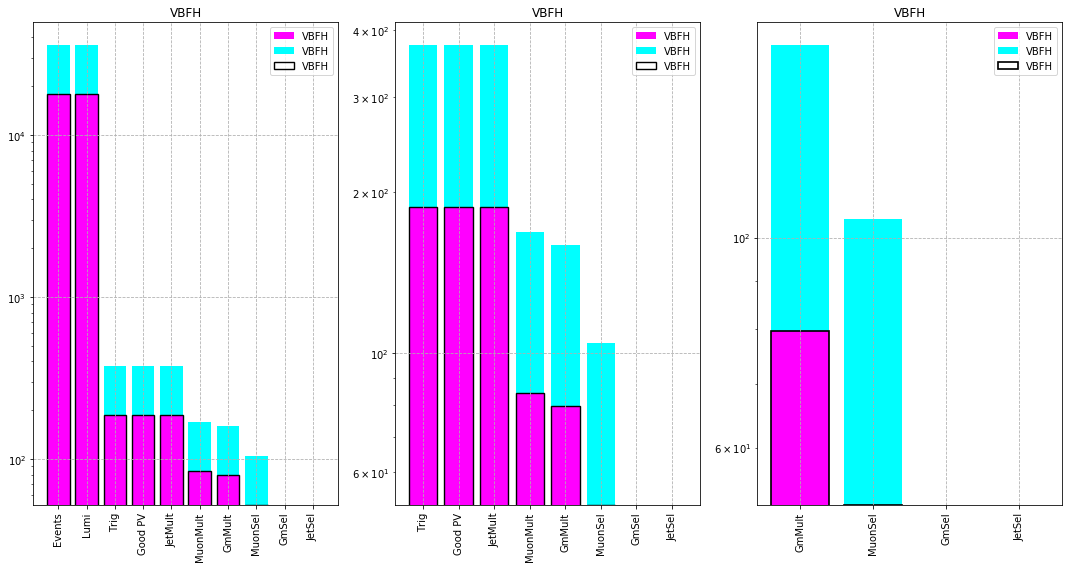

In [11]:
ticks  = ['Events', 'Lumi','Trig','Good PV','JetMult','MuonMult','GmMult','MuonSel', 'GmSel','JetSel']
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
          

#axisLog = False
axisLog = True

N = 11
nx,ny,n = 1, 3,1
fig = plt.figure(figsize=(15,8))
bottoms = None
for j in range(len(listSamples[:-1])):
    #if j != 0 : break
    Event = data[j].TotalEvent_SF
    if j == 0: bottoms = np.array(Event)*0
    #-----------------------------------------------    
    t0 = 1
    n = 1
    plt.subplot(nx,ny,n)
    if axisLog and j == len(listSamples[:-1]) - 1:
        ax = plt.gca()
        ax.set_yscale('log')
    
    #print("-- "+data[j].name + ":: " + str(data[j].TotalEvent_SF[t0:N]))
    #print("-- "+data[j].name + ":: " + str(bottoms[t0:N]))
    #print()
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[j],
            bottom = bottoms[t0:N],
            label = listSamples[j],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')
    #-----------------------------------------------
    t0 = 3
    n = 2
    plt.subplot(nx,ny,n)
    if axisLog and j == len(listSamples[:-1]) - 1:
        ax = plt.gca()
        ax.set_yscale('log')
    
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[j],
            bottom = bottoms[t0:N],
            label = listSamples[j],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')
    #-----------------------------------------------
    n = 3
    t0 = 7
    plt.subplot(nx,ny,n)
    if axisLog and j == len(listSamples[:-1]) -1 :
        ax = plt.gca()
        ax.set_yscale('log')
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[j],
            bottom = bottoms[t0:N],
            label = listSamples[j],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')

    
    bottoms += Event
    

#####################################################################    
Event = data[-1].TotalEvent_SF    
    
n = 1
t0 = 1
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-1],
        bottom = bottoms[t0:N]*0,
        fill = False,
        linewidth = 1.4,
        label = listSamples[-1],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')        
    


n = 2
t0 = 3
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-1],
        bottom = bottoms[t0:N]*0,
        fill = False,
        linewidth = 1.4,
        label = listSamples[-1],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')    
    
n = 3
t0 = 7
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-1],
        bottom = bottoms[t0:N]*0,
        fill = False,
        linewidth = 1.7,
        label = listSamples[-1],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')

plt.tight_layout()
if axisLog:
    fig.savefig(figpath+'cutflow_log_ALL.png')
else:
    fig.savefig(figpath+'cutflow_ALL.png')
plt.show()

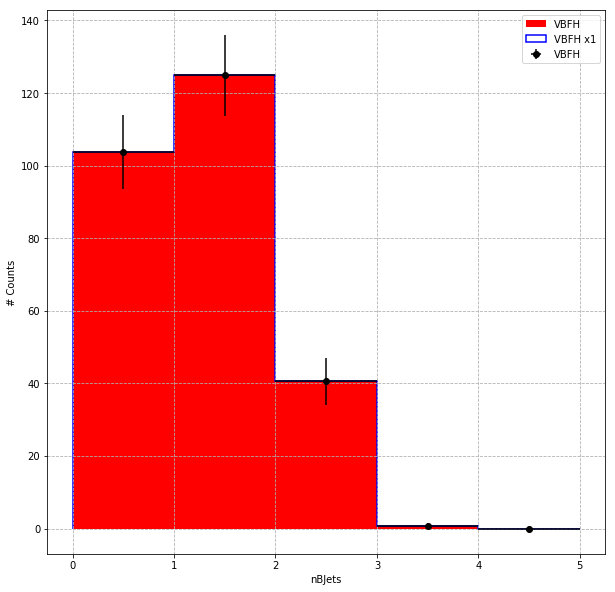

In [12]:
'''
colors      = ['magenta',     'cyan',    'r',   'limegreen',    "b",    'k']
legend      = [  "ttbar",  "DY+Jets",   "V V", "W+Jets",   "WH", 'Data'] 
''';
var,part = 'nBJets',''
'''
nBJets = [
        TT.GetHistVal(var,part) , 
        DYJets.GetHistVal(var,part),  
        Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part), 
        Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part),
        WH.GetHistVal(var,part),
        SingleMuon[var][part],
        ]
''';

legend      = ['VBFH','VBFH','VBFH']
colors      = ['r','b','k']
'''
nBJets = [        
        VBFH.GetHistVal(var,part),
        VBFH.GetHistVal(var,part),
        VBFH.GetHistVal(var,part),
        ]
''';
nBJets = [  d.nBJets for d in data]      
weights = [ d.weights for d in data]
    
#############
fig = plt.figure(figsize=(10,10))
plt.grid(linestyle='--')
plt.hist(
        nBJets[:-2],
        range    = Help.plotOpsAll[0]['range'][var][part],
        bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = colors[:-2],
        weights  = weights[:-2], 
        )
plt.legend()

plt.hist(
        nBJets[-2],
        range     = Help.plotOpsAll[-2]['range'][var][part],
        bins      = Help.plotOpsAll[-2]['bins'][var][part],
        histtype  = Help.plotOpsAll[-2]['histtype'],
        stacked   = Help.plotOpsAll[-2]['stacked'],
        label     = legend[-2]+" x"+str(mag),
        color     = colors[-2],
        #weights   = np.ones(np.shape(nBJets[-2]))*mag,
        linewidth = 1.5,
        weights   = np.array(weights[-2])*mag, 
        )

y3,x3 =np.histogram(
                    nBJets[-1],
                    bins    = Help.plotOpsAll[-1]['bins'][var][part],
                    range   = Help.plotOpsAll[-1]['range'][var][part],
                    weights = weights[-1],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     = 'k',
            marker    = 'o',
            linestyle = '',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('nBJets')
plt.legend()
plt.show()
fig.savefig(figpath+"nBJets.png")

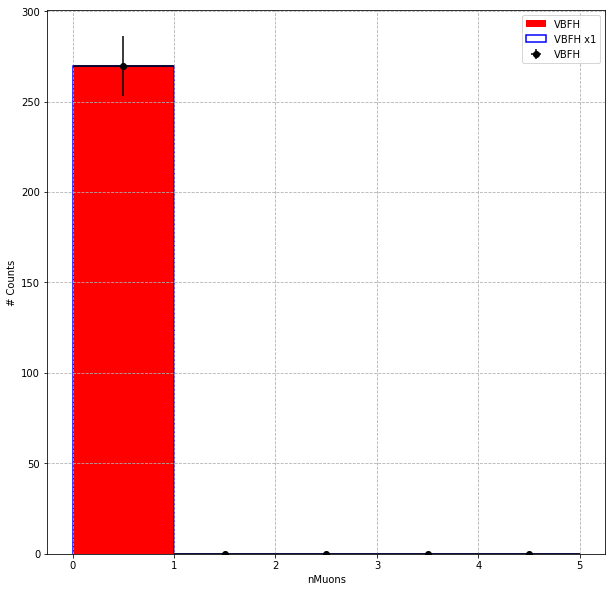

In [13]:
var,part = 'nMuons',''
'''
nMuons = [
        TT.GetHistVal(var,part) , 
        DYJets.GetHistVal(var,part),  
        Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part), 
        Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part),
        WH.GetHistVal(var,part),
        SingleMuon[var][part],
        ]
''';
#############
legend      = ['VBFH','VBFH','VBFH']
colors      = ['r','b','k']
nMuons = [ d.nMuons for d in data]     
weights = [d.weights for d in data]
#########

#nMuons = [d.nMuons for d in data]
fig = plt.figure(figsize=(10,10))
plt.grid(linestyle='--')
plt.hist(
        nMuons[:-2],
        range    = Help.plotOpsAll[0]['range'][var][part],
        bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = colors[:-2],
        weights  = weights[:-2],
        )
plt.legend()

plt.hist(
        nMuons[-2],
        range     = Help.plotOpsAll[-2]['range'][var][part],
        bins      = Help.plotOpsAll[-2]['bins'][var][part],
        histtype  = Help.plotOpsAll[-2]['histtype'],
        stacked   = Help.plotOpsAll[-2]['stacked'],
        label     = legend[-2]+" x"+str(mag),
        color     = colors[-2],
        weights   = np.array(weights[-2])*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    nMuons[-1],
                    bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    range = Help.plotOpsAll[-1]['range'][var][part],
                    weights = weights[-1],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('nMuons')
plt.legend()
plt.show()
fig.savefig(figpath+"nMuons.png")

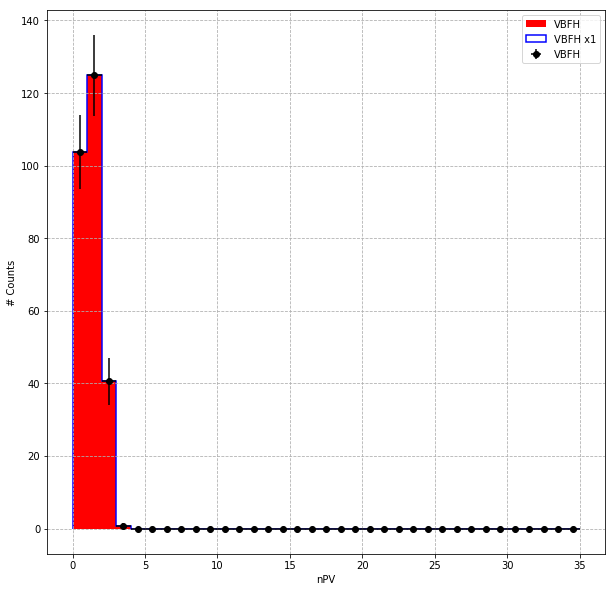

In [14]:
var,part = 'nPV',''
'''
nPV = [
        TT.GetHistVal(var,part) , 
        DYJets.GetHistVal(var,part),  
        Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part), 
        Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part),
        WH.GetHistVal(var,part),
        SingleMuon[var][part],
        ]
''';
#####
legend      = ['VBFH','VBFH','VBFH']
colors      = ['r','b','k']
nPV = [ d.nPV for d in data]     
weights = [d.weights for d in data]
########

fig = plt.figure(figsize=(10,10))
plt.grid(linestyle='--')
plt.hist(
        nBJets[:-2],
        range    = Help.plotOpsAll[0]['range'][var][part],
        bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = colors[:-2],
        weights  = weights[:-2],
        )
plt.legend()

plt.hist(
        nBJets[-2],
        range    = Help.plotOpsAll[-2]['range'][var][part],
        bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = colors[-2],
        weights   = np.array(weights[-2])*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    nBJets[-1],
                    bins    = Help.plotOpsAll[-1]['bins'][var][part],
                    range   = Help.plotOpsAll[-1]['range'][var][part],
                    weights = weights[-1],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('nPV')
plt.legend()
plt.show()
fig.savefig(figpath+"nPV.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide


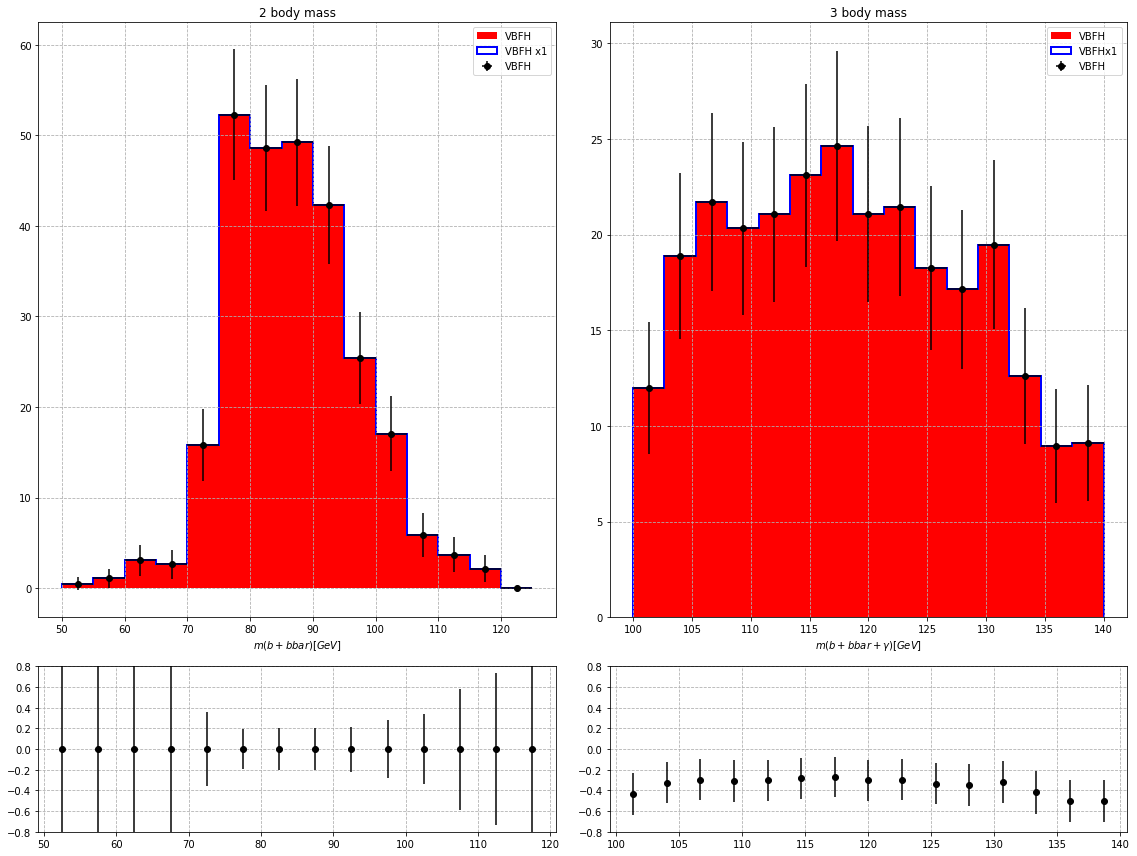

In [15]:
fig = plt.figure(figsize = (16,12))
var,part = 'm2',''

nx,ny = 2,2
n = 1
plt.subplot2grid((4,2),(0,0),rowspan = 3, colspan = 1)
M2 = [d.dijet_m for d in data]#values['m2']['']
M3 = [d.dijetgm_m for d in data]#values['m3']['']
title_lab  = "2 body mass"
COL        = colors[0:len(M2)]#[i]
bHiggs     = 20
rHiggs     = [80,200]
#weight     = np.array([w[i] for ii in range(len(M2))])
#weight     = np.array([np.array([1 for i in range(len(M2[ii]))]) for ii in range(len(M2))])
weights = [d.weights for d in data]

ax = plt.gca()
h2_bg = ax.hist(
        M2[:-2],
        bins      = Help.plotOpsAll[0][    'bins'][var][part],
        range     = Help.plotOpsAll[0][   'range'][var][part],
        histtype  = Help.plotOpsAll[0]['histtype'],
        stacked   = Help.plotOpsAll[0]['stacked'],
        color     = COL[:-2],
        weights   = weights[:-2],
        label     = legend[:-2],
        #linestyle = line_style[k],
        linewidth = 1.2
        )
ax.legend(prop={'size': 10})
ax.set_title(title_lab)
ax.set_xlabel(r"$m(b+bbar)[GeV]$")
ax.grid(linestyle='--')

h2_sig = ax.hist(
        M2[-2],
        bins      = Help.plotOpsAll[-2][    'bins'][var][part],
        range     = Help.plotOpsAll[-2][   'range'][var][part],
        histtype  = Help.plotOpsAll[-2]['histtype'],
        stacked   = Help.plotOpsAll[-2]['stacked'],
        color     = COL[-2],
        weights   = np.array(weights[-2])*mag,
        #weights   = weight[-2]*mag,
        label     = legend[-2]+ " x"+str(mag),
        linewidth = 2
        )
ax.legend(prop={'size': 10})
ax.set_title(title_lab)
ax.set_xlabel(r"$m(b+bbar)[GeV]$")
ax.grid(linestyle='--') 


y2,x2 =np.histogram(
                    M2[-1],
                    bins    = Help.plotOpsAll[-1][ 'bins'][var][part],
                    range   = Help.plotOpsAll[-1]['range'][var][part],
                    weights = weights[-1],
                    )
x2b = (x2[1:len(x2)] + x2[0:-1])/2
ax = plt.gca()

ax.errorbar(
            x2b,y2,
            xerr = np.diff(x2)/2,yerr = np.sqrt(y2),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
            )
ax.legend(prop={'size': 10})
ax.set_title(title_lab)
ax.set_xlabel(r"$m(b+bbar)[GeV]$")
ax.grid(linestyle='--')


h = (h2_bg[0][-1]+h2_sig[0]/mag )
rDataMC = y2/(h2_bg[0][-1]+h2_sig[0]/mag) - 1 

plt.subplot2grid((4,2),(3,0),rowspan = 1, colspan = 1)
ax = plt.gca()
ax.errorbar(
        x2b, rDataMC,
        yerr = y2/h*np.sqrt(1/y2+1/h),
        color = 'k',
        marker = 'o',
        linestyle = '',
        linewidth = 1.5
       )
ax.grid(linestyle = '--')
ax.set_ylim(-0.8,0.8)
    
#_--------------/--------------------------------
#_----------------------------------------------
#_----------------------------------------------
weight     = np.array([np.array([1 for i in range(len(M3[ii]))]) for ii in range(len(M3))])

var = 'm3'
n = 2
title_lab  = "3 body mass"
plt.subplot2grid((4,2),(0,1),rowspan = 3, colspan = 1)
ax = plt.gca()
h3_bg = ax.hist(
        M3[:-2],
        bins      = Help.plotOpsAll[0][    'bins'][var][part],
        range     = Help.plotOpsAll[0][   'range'][var][part],
        histtype  = Help.plotOpsAll[0]['histtype'],
        stacked   = Help.plotOpsAll[0]['stacked'],
        color     = COL[:-2],
        weights   = weights[:-2],
        label     = legend[:-2],
        linewidth = 1.2
        )
ax.legend(prop={'size': 10})


ax = plt.gca()
h3_sig = ax.hist(
                M3[-2],
                bins      = Help.plotOpsAll[-2][    'bins'][var][part],
                range     = Help.plotOpsAll[-2][   'range'][var][part],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = COL[-2],
                weights   = np.array(weights[-2])*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
ax.set_title(title_lab)
ax.set_xlabel(r"$m(b+bbar+\gamma)[GeV]$")
ax.grid(linestyle='--')    


y3,x3 =np.histogram(
                    M3[-1],
                    bins    = Help.plotOpsAll[-1][ 'bins'][var][part],
                    range   = Help.plotOpsAll[-1]['range'][var][part],
                    weights = weights[-1],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()

ax.errorbar(
            x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})
    
    
h = (h3_bg[0][-1]+h3_sig[0]/mag )
rDataMC = y3/(h3_bg[0][-1]+h3_sig[0]/mag) - 1
plt.subplot2grid((4,2),(3,1),rowspan = 1, colspan = 1)    
ax = plt.gca()
ax.errorbar(
            x3b, rDataMC,
            yerr = y3/h*np.sqrt(1/y3+1/h),
            color = 'k',
            marker = 'o',
            linestyle = '',
            linewidth = 1.5
           )
ax.grid(linestyle = '--')
ax.set_ylim(-0.8,0.8)    
    
plt.tight_layout()
plt.show()
fig.savefig(figpath+"Mass.png")

In [16]:

var = 'pt'
print(len(values[var]['jet1'][2]))
list(values[var].keys())

856


['photon', 'lepton', 'jet1', 'jet2', 'dijet', 'dijetgm']

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


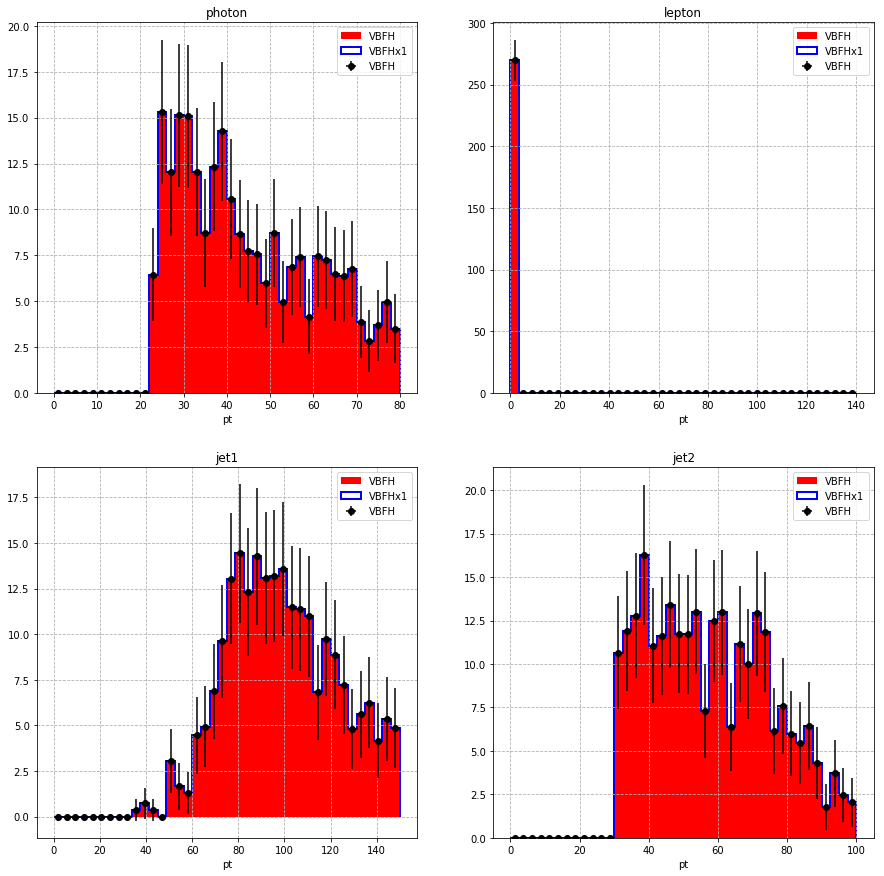

In [17]:
htemp = []
var = 'pt'
fig = plt.figure(figsize = (15, 15))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),list(values[var].keys())[:-2]):
    nx,ny = 2,2
    plt.subplot(nx,ny,j+1)
    title_lab = k
    #weight = np.array([w[i] for _ in PT]) 
    #COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]
    COL = colors

    
    ax = plt.gca()
    h = ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            weights   = weights[:-2],
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    htemp.append(h)
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    h3_sig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.array(weights[-2])*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k],
                        weights = weights[-1]
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})

        
plt.show()
fig.savefig(figpath+var+".png")

In [18]:

[len(values['pt'][k]) for k in ['photon','lepton','jet1','jet2']]
for k in ['photon','lepton','jet1','jet2']:
    m = 0
    for i in range(len(values['pt'][k])):
        m += len(values['pt'][k][i])
    print(m)

2568
2568
2568
2568


/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


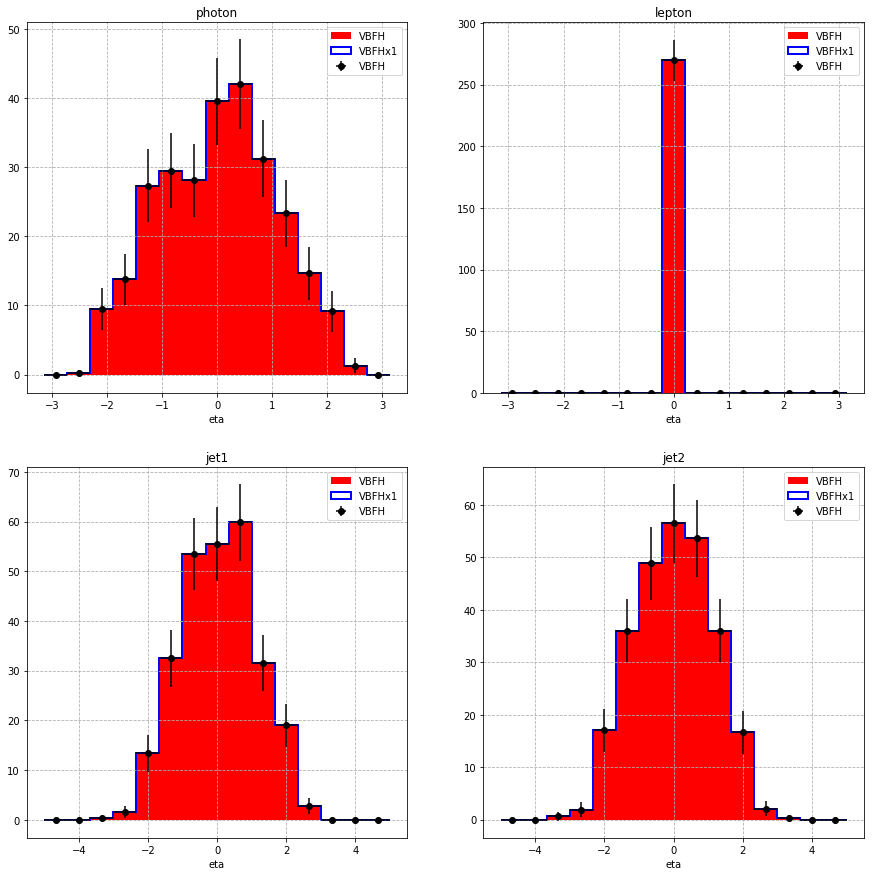

In [19]:
var = 'eta'
fig = plt.figure(figsize = (15, 15))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),list(values[var].keys())[:-2]):
    nx,ny = 2,2
    plt.subplot(nx,ny,j+1)
    #PT = values[var][k][:-2]#data_pt[k][:-2]
    title_lab = k
    #weight = np.array([w[i] for _ in PT]) 
    #COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]
    COL = colors
    
    ax = plt.gca()
    ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            weights   = weights[:-2],
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    h3_sig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.array(weights[-2])*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k],
                        weights = weights[-1],
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})

        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


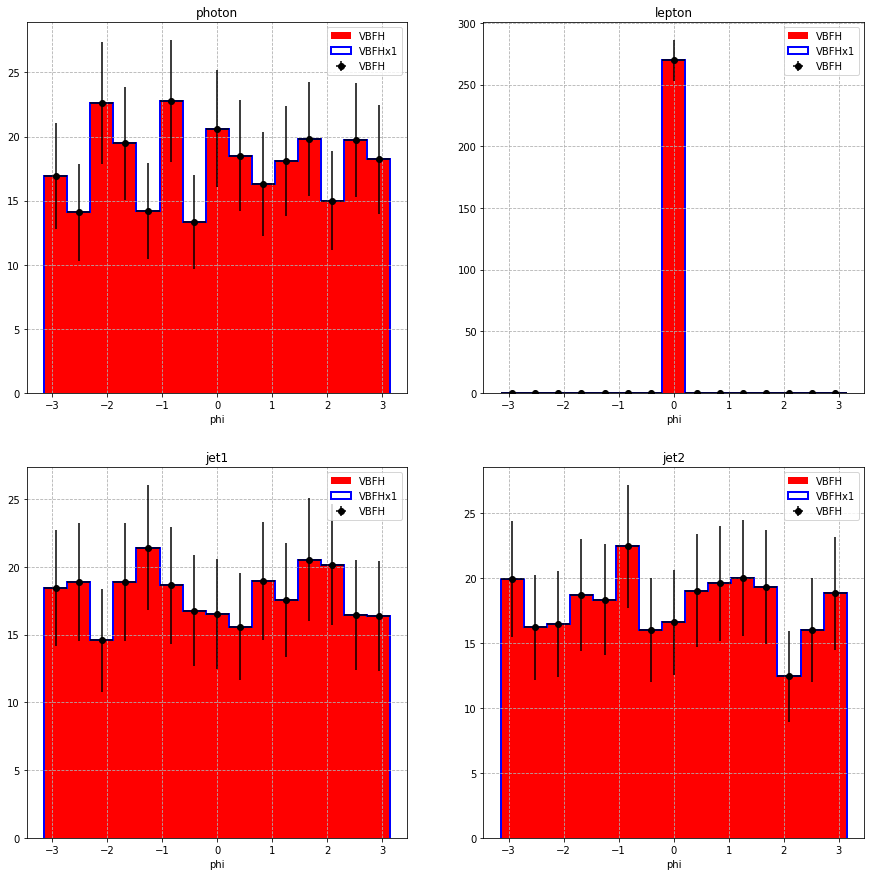

In [20]:
var = 'phi'
fig = plt.figure(figsize = (15, 15))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),list(values[var].keys())[:-2]):
    nx,ny = 2,2
    plt.subplot(nx,ny,j+1)
    #PT = values[var][k][:-2]#data_pt[k][:-2]
    title_lab = k
    #weight = np.array([w[i] for _ in PT]) 
    #COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]
    COL = colors
    
    ax = plt.gca()
    ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            weights   = weights[:-2],
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    h3_sig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.array(weights[-2])*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k],
                        weights = weights[-1],
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})

        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in sqrt


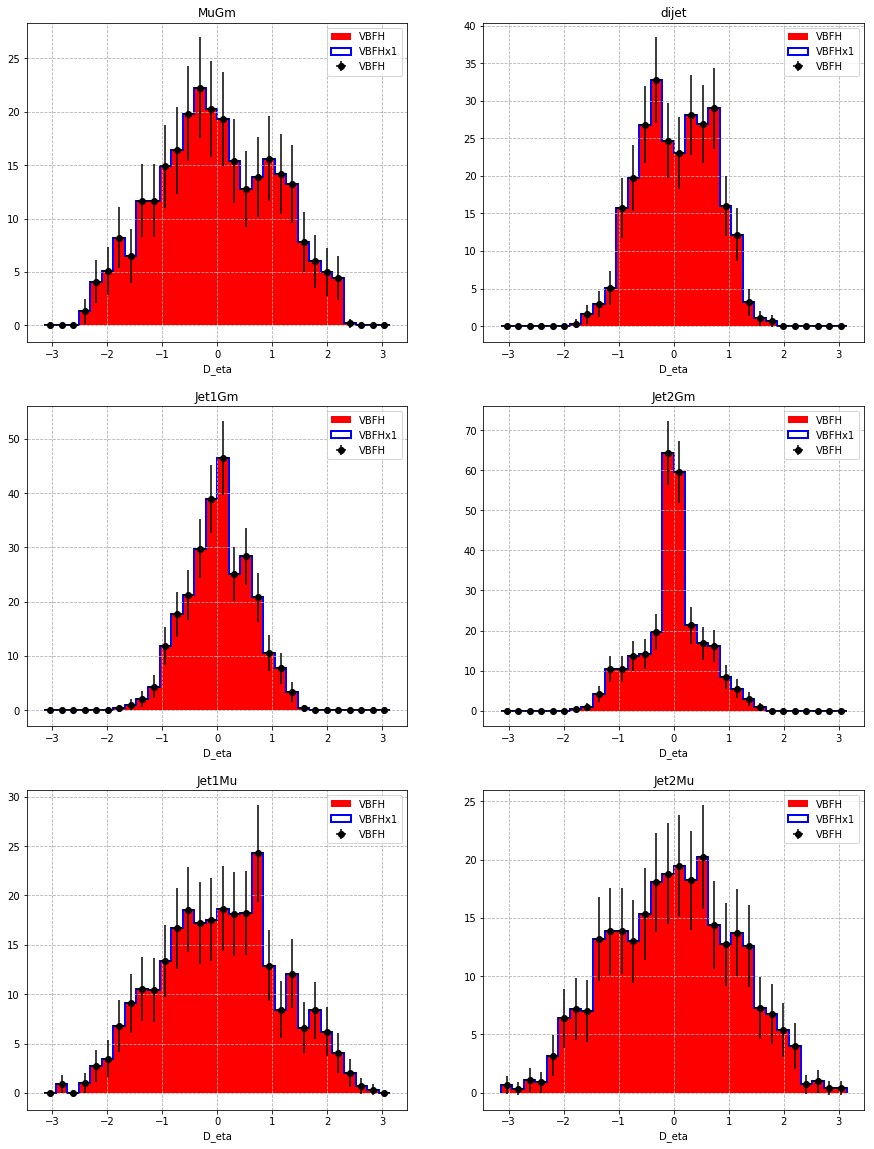

In [21]:
var = 'D_eta'
fig = plt.figure(figsize = (15, 20))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),list(values[var].keys())[:-2]):
    nx,ny = 3,2
    plt.subplot(nx,ny,j+1)
    #PT = values[var][k][:-2]#data_pt[k][:-2]
    title_lab = k
    #weight = np.array([w[i] for _ in PT]) 
    #COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]
    COL = colors

    ax = plt.gca()
    ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            weights   = weights[:-2],
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    h3_sig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.array(weights[-2])*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k],
                        weights = weights[-1],
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})

        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


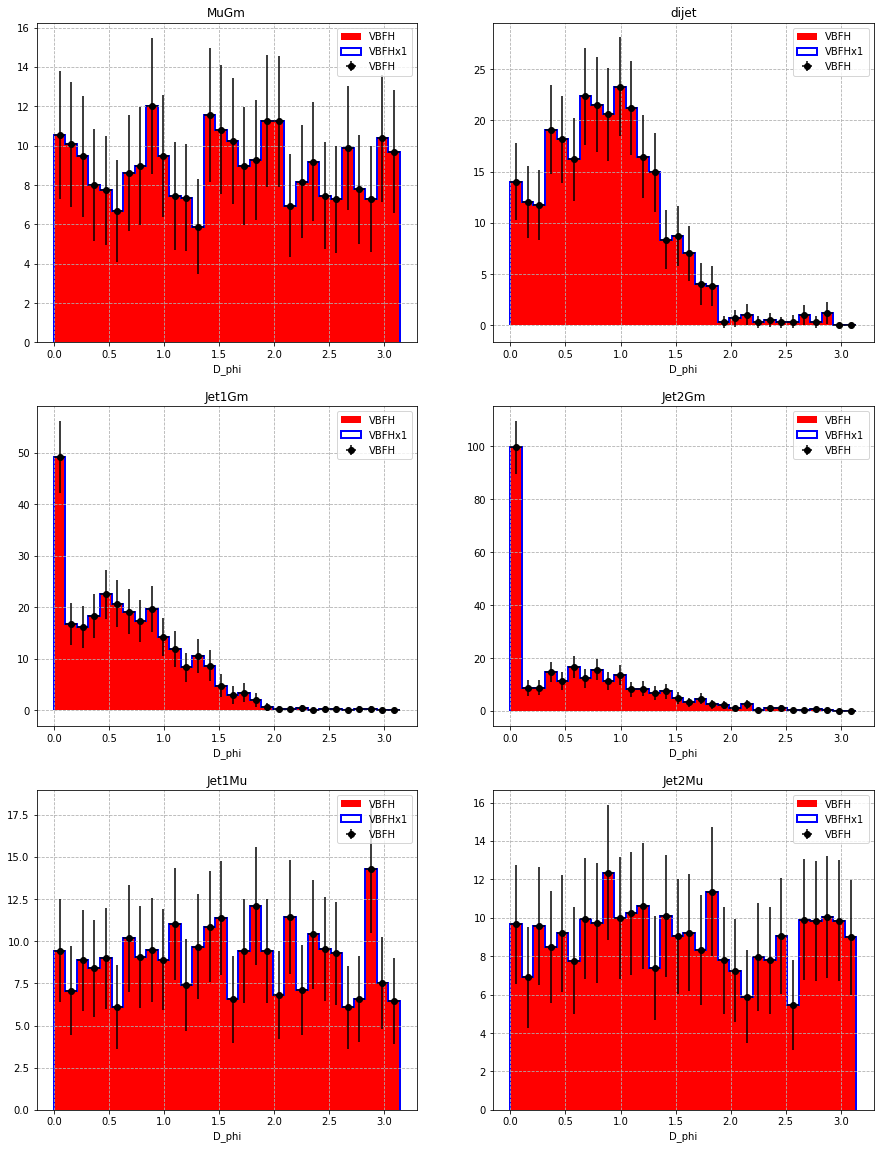

In [22]:
var = 'D_phi'
fig = plt.figure(figsize = (15, 20))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),list(values[var].keys())[:-2]):
    nx,ny = 3,2
    plt.subplot(nx,ny,j+1)
    #PT = values[var][k][:-2]#data_pt[k][:-2]
    title_lab = k
    #weight = np.array([w[i] for _ in PT]) 
    #COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]
    COL = colors
    
    ax = plt.gca()
    ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0][    'bins'][var][k],
            range     = Help.plotOpsAll[0][   'range'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            normed    = Help.plotOpsAll[0][  'normed'],
            stacked   = Help.plotOpsAll[0][ 'stacked'],
            color     = COL[:-2],
            weights   = weights[:-2],
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    h3_sig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2][    'bins'][var][k],
                    range     = Help.plotOpsAll[-2][   'range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2][ 'stacked'],
                    color     = COL[-2],
                    weights   = np.array(weights[-2])*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1][ 'bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k],
                        weights = weights[-1],
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})

        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


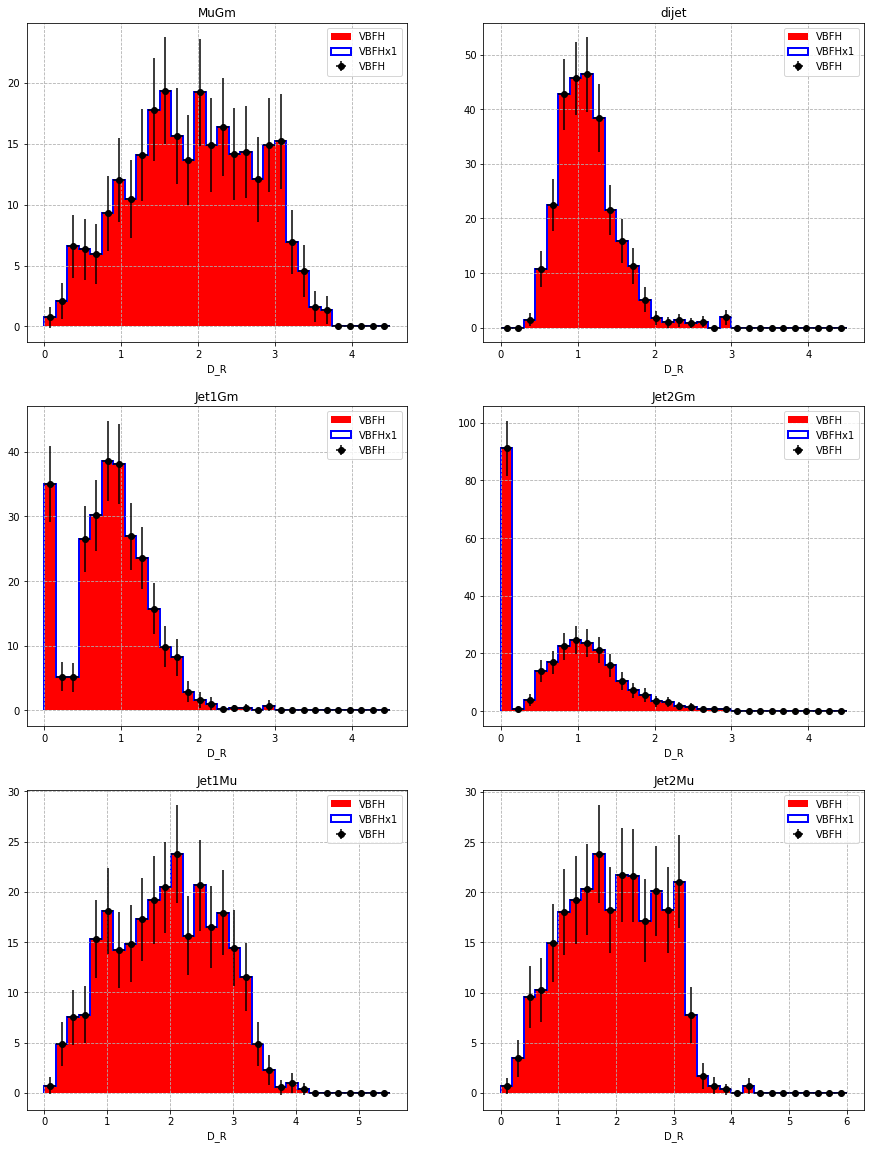

In [23]:
var = 'D_R'
fig = plt.figure(figsize = (15, 20))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),list(values[var].keys())[:-2]):
    nx,ny = 3,2
    plt.subplot(nx,ny,j+1)
    #PT = values[var][k][:-2]#data_pt[k][:-2]
    title_lab = k
    #weight = np.array([w[i] for _ in PT]) 
    #COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]
    COL = colors

    ax = plt.gca()
    ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            weights   = weights[:-2],
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    h3_sig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.array(weights[-2])*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k],
                        weights = weights[-1],
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})

        
plt.show()
fig.savefig(figpath+var+".png")

VBFH:: [17852.04802454832, 17852.04802454832, 187.61626829492792, 187.61626829492792, 187.61626829492792, 84.22591094567356, 79.77048232318504, 52.2444780938381, 0.0, 0.0, 0.0]

VBFH:: [17852.04802454832, 17852.04802454832, 187.61626829492792, 187.61626829492792, 187.61626829492792, 84.22591094567356, 79.77048232318504, 52.2444780938381, 0.0, 0.0, 0.0]

VBFH:: [17852.04802454832, 17852.04802454832, 187.61626829492792, 187.61626829492792, 187.61626829492792, 84.22591094567356, 79.77048232318504, 52.2444780938381, 0.0, 0.0, 0.0]



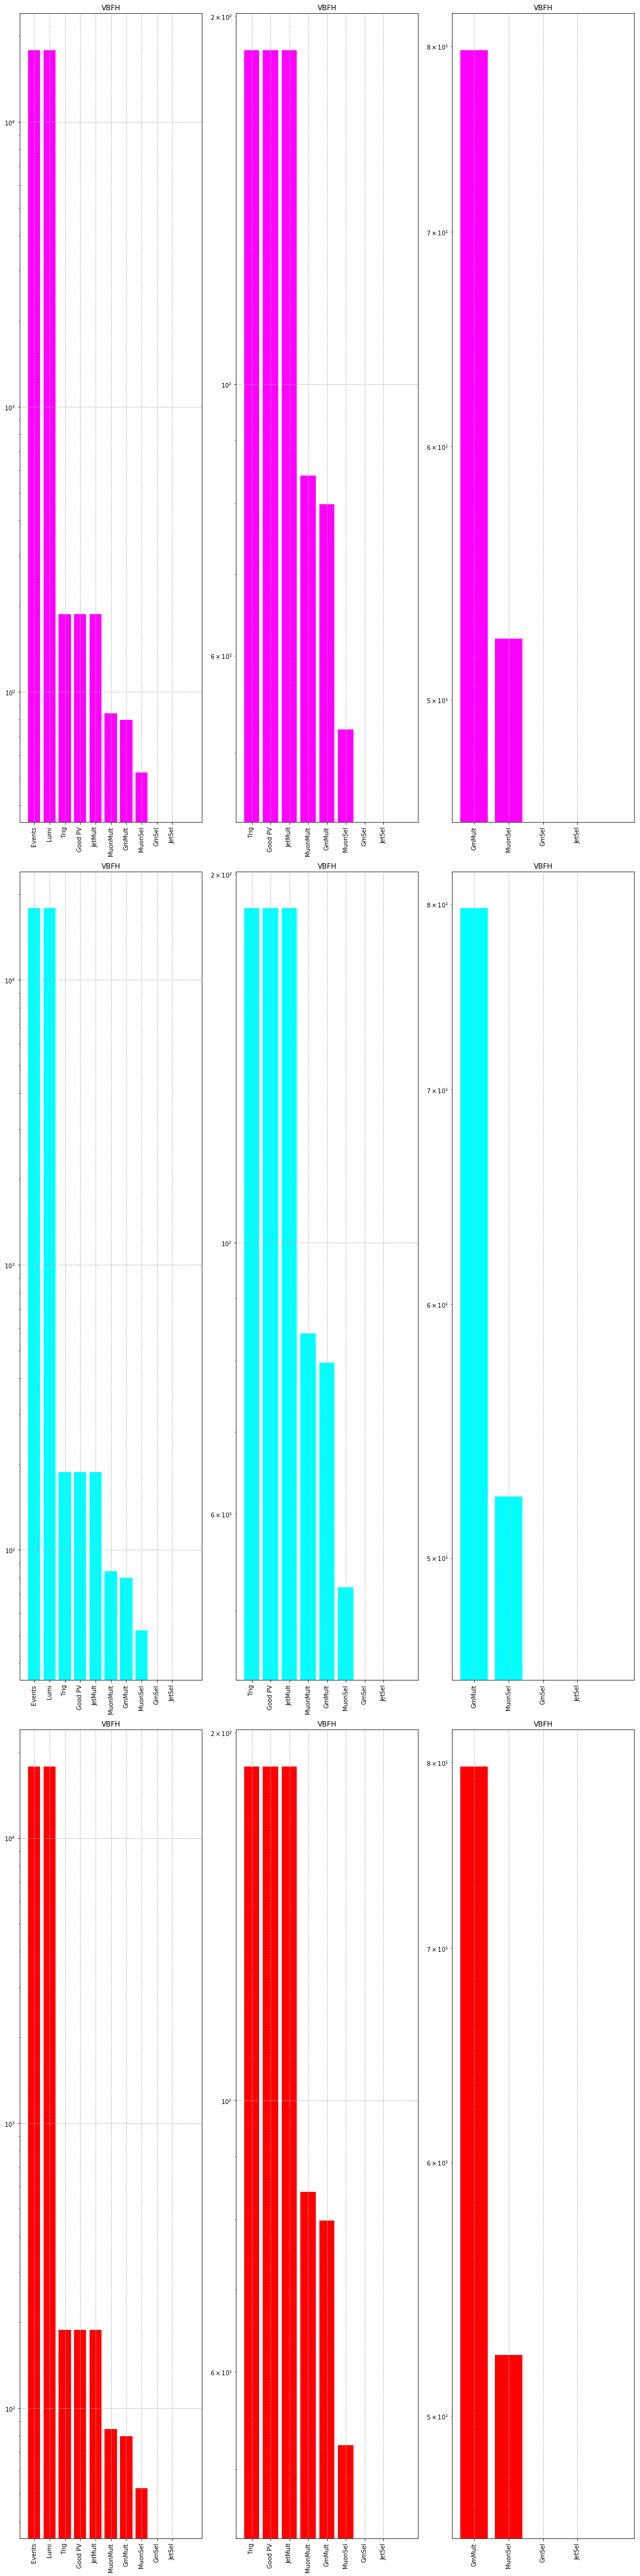

In [24]:
ticks  = ['Events','Lumi','Trig','Good PV','JetMult','MuonMult','GmMult','MuonSel', 'GmSel','JetSel']

axisLog = True
N = 12
nx,ny,n = len(colors), 3,1
fig = plt.figure(figsize=(15,60))
for j in range(len(listSamples)):
    t0 = 1
    Event = data[j].TotalEvent_SF
    print(listSamples[j]+":: "+str(Event[t0:N])+"\n")
    #-----------------------------------------------
    plt.subplot(nx,ny,n)
    if axisLog:
        ax = plt.gca()
        ax.set_yscale('log')
    t0 = 1
    plt.bar(
            range(1,N+1-t0),
            Event[t0:N],
            color = Colors[j]
            )
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N-t0), ticks[t0-1:N],rotation='vertical')
    n +=1
    #-----------------------------------------------
    plt.subplot(nx,ny,n)
    if axisLog:
        ax = plt.gca()
        ax.set_yscale('log')
    t0 = 3
    plt.bar(
            range(1,N+1-t0),
            Event[t0:N],
            color = Colors[j]
            )
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N-t0), ticks[t0-1:N],rotation='vertical')
    n +=1
    #-----------------------------------------------
    plt.subplot(nx,ny,n)
    if axisLog:
        ax = plt.gca()
        ax.set_yscale('log')
    t0 = 7
    plt.bar(
            range(1,N+1-t0),
            Event[t0:N],
            color = Colors[j]
            )
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N-t0), ticks[t0-1:N],rotation='vertical')
    n +=1
    
plt.tight_layout()
if axisLog:
    fig.savefig(figpath+'cutflow_log.png')
else:
    fig.savefig(figpath+'cutflow.png')
plt.show()

# Muon

Transverse mass of W 6400
Transverse mass of Mu 1600.011025


ValueError: color kwarg must have one color per dataset

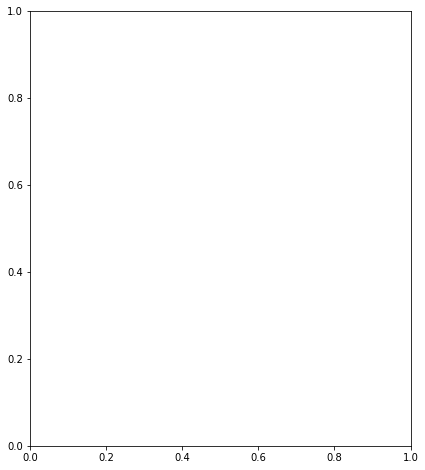

In [25]:
print("Transverse mass of W "+str(80**2)) # Transverse mass of Wp
print("Transverse mass of Mu "+str((0.105**2) + (80.0/2)**2)) # Transverse mass of mu, for Wpt = 0
Mt2   = [d.lep1_Mt2 for d in data]
lepPt = [d.lepton_pt for d in data]
w = [np.array([d.ScaleFactor() for _ in d.lep1_Mt2])*np.array(d.eventWeight)*np.array(d.genWeight) for d in data]

fig = plt.figure(figsize= (15,8))

plt.subplot(1,2,1)
plt.hist(
        Mt2[:-2],
        range = [0,10000],
        bins = 40,
        stacked = True,
        histtype = 'stepfilled',
        label     = listSamples[:-2],
        weights = w[:-2],
        color = Colors[:-2],
        )
plt.hist(
        Mt2[-2],
        range = [0,10000],
        bins = 40,
        stacked = False,
        histtype = 'step',
        linewidth = 1.7,
        label     = listSamples[-2],
        weights = w[-2],
        color = Colors[-2],
        )
plt.title(r"$\mu \  M_t^2$ from the W decay")
plt.xlabel(r"$M_t^2$")
plt.legend()
plt.grid(True,linestyle = '--')


y3,x3 =np.histogram(
                    Mt2[-1],
                    bins  = 40,
                    range =[0,10000],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})


#----------------------------------------------------
plt.subplot(1,2,2)
plt.hist(lepPt[:-2],
        range = [0,200],
        bins = 40,
        histtype = 'stepfilled',
        stacked = True,
        label     = listSamples[:-2],
        weights = w[:-2],
        color = Colors[:-2],
        )
plt.hist(lepPt[-2],
        range = [0,200],
        bins = 40,
        histtype = 'step',
        stacked = False,
        linewidth = 1.7,
        label     = listSamples[-2],
        weights = w[-2],
        color = Colors[-2]
        )

y3,x3 =np.histogram(
                    lepPt[-1],
                    bins  = 40,
                    range =[0,200],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})


plt.title(r"$\mu \  p_t$ from the W decay")
plt.xlabel(r"$p_t$")
plt.legend()
plt.grid(True,linestyle = '--')

fig.savefig(figpath+"Wvariables.png")
plt.show()